# PROYECTO No. 1 MODELOS DE REGRESIÓN LINEAL

### 1 .Importando Paquetes necesarios

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

##### 1.1 .Importando data set y agregando nombre de columnas

In [5]:
data_frame = np.load('D:/MAESTRIA CIENCIA DE DATOS/1. CIENCIA DE DATOS EN PHYTON/TAREAS/PROYECTO 1/proyecto_training_data.npy')
nombre_columnas=['precio_venta','calificacion_general','primer_nivel_m2','cantidad_cuartos','año_construccion','pies_calle']
data_set=pd.DataFrame(data_frame, columns=nombre_columnas)
data_set

,precio_venta,calificacion_general,primer_nivel_m2,cantidad_cuartos,año_construccion,pies_calle
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


##### 1.2 Revisando cantidad de Nan

In [6]:
Nan = data_set.isna().mean() * 100
print("Porcentaje de NaN por columna:")
print(Nan)

Porcentaje de NaN por columna:
precio_venta             0.000000
calificacion_general     0.000000
primer_nivel_m2          0.000000
cantidad_cuartos         0.000000
año_construccion         0.000000
pies_calle              17.739726
dtype: float64


##### 1.3 Interpolando valores Nan

Unicamente tenemos una columna con valores vacios, aplicaremos una interpolacion lineal para rellenar estos valores y no sea necesario elimiar el 17% de los registros que afectarian las demas variables que si tienen datos registrados

In [8]:
data_set['pies_calle'] = data_set['pies_calle'].interpolate(method='linear')

In [9]:
Nan = data_set.isna().mean() * 100
print("Porcentaje de NaN por columna:")
print(Nan)

Porcentaje de NaN por columna:
precio_venta            0.0
calificacion_general    0.0
primer_nivel_m2         0.0
cantidad_cuartos        0.0
año_construccion        0.0
pies_calle              0.0
dtype: float64


### 2. Separando Data_set de entrenamiento y de validacion

Data set de entrenamiento = 80%  = 1168 registros  
Data set de validacion = 20% = 292 registros

In [11]:
#calculando la cantidad de lineas
cant_lineas_entrenamiento = int(len(data_set)*0.8)
cant_lineas_validacion = int(len(data_set)*0.2)
# a partir de la cantidad de lineas, tomar indices aleatorios
indices = np.random.permutation(len(data_set))
# Extrayendo data set entrenamiento
entrenamiento = indices[:cant_lineas_entrenamiento]
data_set_entrenamiento = data_set.iloc[entrenamiento]
# Extrayendo data set validacion
validacion = np.setdiff1d(indices, entrenamiento)
data_set_validacion = data_set.iloc[validacion]

In [12]:
# data set entrenamiento
data_set_entrenamiento

,precio_venta,calificacion_general,primer_nivel_m2,cantidad_cuartos,año_construccion,pies_calle
1041,173000.0,6.0,800.0,7.0,1966.0,61.0
434,81000.0,4.0,630.0,3.0,1972.0,21.0
1350,200000.0,5.0,1338.0,12.0,1969.0,91.0
223,97000.0,4.0,864.0,4.0,1971.0,70.0
506,215000.0,8.0,1065.0,8.0,1993.0,80.0
...,...,...,...,...,...,...
296,152000.0,5.0,910.0,6.0,1950.0,75.0
257,220000.0,7.0,1604.0,8.0,2006.0,68.0
116,139000.0,5.0,1092.0,6.0,1962.0,54.0
1290,180500.0,5.0,1152.0,6.0,1964.0,53.5


In [13]:
# data set validacion
data_set_validacion

,precio_venta,calificacion_general,primer_nivel_m2,cantidad_cuartos,año_construccion,pies_calle
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,63.0
10,129500.0,5.0,1040.0,5.0,1965.0,70.0
13,279500.0,7.0,1494.0,7.0,2006.0,91.0
...,...,...,...,...,...,...
1447,240000.0,8.0,1220.0,8.0,1995.0,80.0
1451,287090.0,8.0,1578.0,7.0,2008.0,78.0
1454,185000.0,7.0,1221.0,6.0,2004.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0


### 3.Analisis exploratorio de datos

In [14]:
media_datos = round(data_set_entrenamiento.mean(),2)
maximo_datos = round(data_set_entrenamiento.max(),2)
minimo_datos = round(data_set_entrenamiento.min(),2)
rango_datos = round(np.ptp(data_set_entrenamiento.values),2)
desviacion_datos = round(data_set_entrenamiento.std(),2)
resultados = pd.DataFrame({'Media': media_datos, 
                           'Máximo': maximo_datos, 
                           'Mínimo': minimo_datos, 
                           'Rango':maximo_datos- minimo_datos,
                           'Desviación Estándar': desviacion_datos})
resultados

,Media,Máximo,Mínimo,Rango,Desviación Estándar
precio_venta,181552.57,755000.0,34900.0,720100.0,81691.30
calificacion_general,6.10,10.0,1.0,9.0,1.39
primer_nivel_m2,1163.48,3228.0,334.0,2894.0,375.09
cantidad_cuartos,6.52,14.0,2.0,12.0,1.63
año_construccion,1970.92,2010.0,1872.0,138.0,30.59
pies_calle,69.94,313.0,21.0,292.0,22.12


### 3.Histograma para cada variable

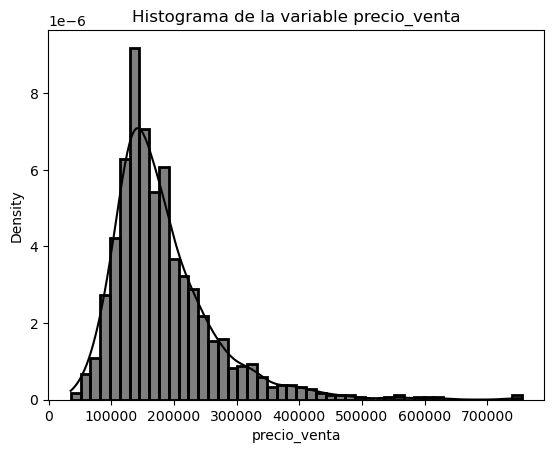

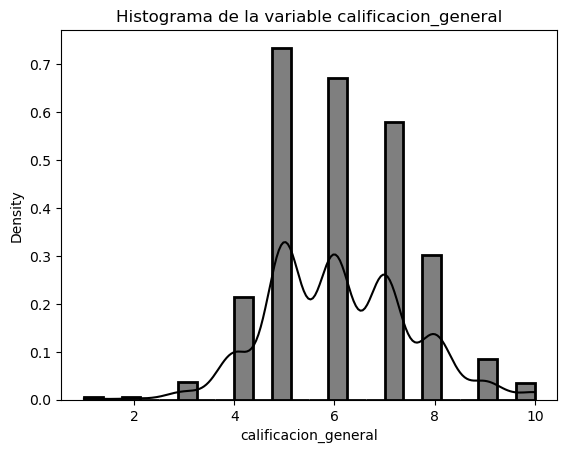

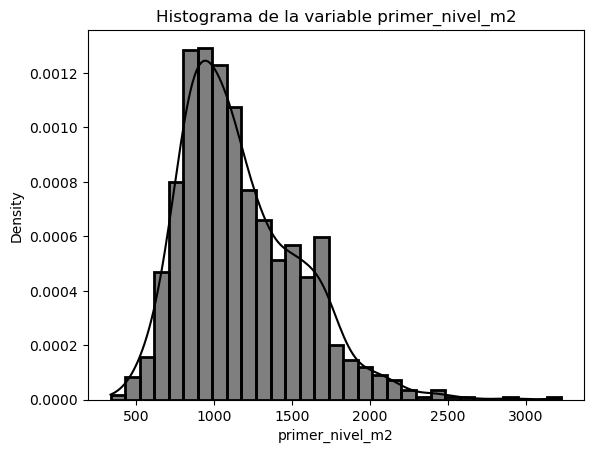

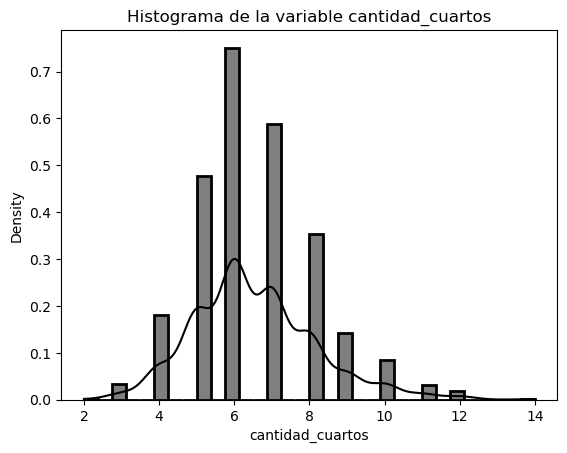

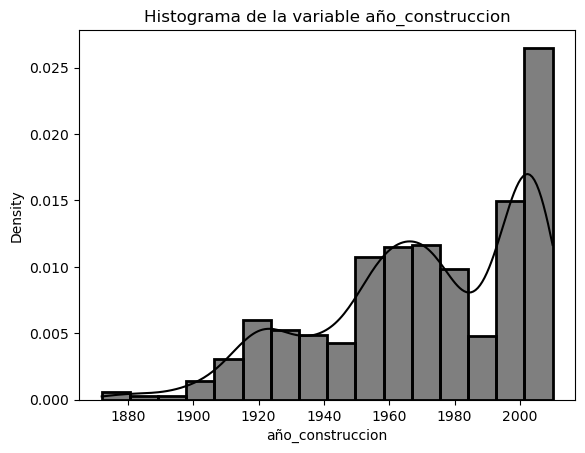

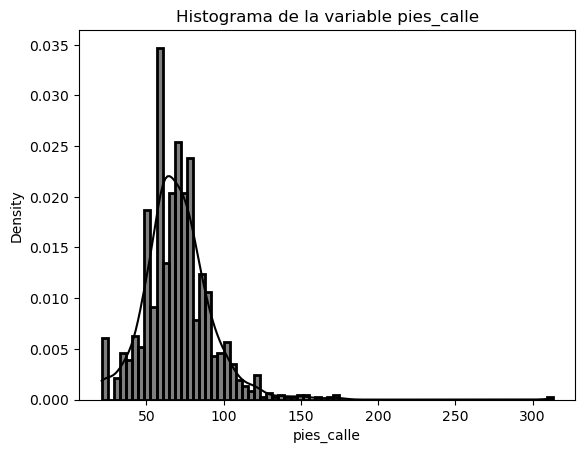

In [15]:
for col in data_set_entrenamiento.columns:
    sns.histplot(data=data_set_entrenamiento, x=col, color = 'black', kde = True, linewidth=2, stat="density" )
    plt.title(f'Histograma de la variable {col}') 
    plt.show()

### 5. Variables dependientes e independientes

Para este estudio definiremos la variable dendiente **Y** como *precio de venta* por que nos interesa ver como influye las demas variables en el precio de venta de una casa. Por lo que las variables independientes o regresoras seran **X** como *calificacion_general*, *primer_nivel_m2*, *cantidad_cuartos*, *año_construccion* y *pies_calle*, se buscará cual de todas esas variables tiene un mejor coeficiente de correlacion lineal con la dependiete y sobre eso se trabajara.

- Calcular el coeficiente de correlacion entre la variable dependiente con cada uno de las independientes

In [16]:
#Funcion que nos ayudara a calcular el coeficiente de correlacion
def coeficiente_correlacion(x,y):
    covarianza = np.cov(x, y)[0, 1]
    desviacion_estandar_x = np.std(x)
    desviacion_estandar_y = np.std(y)
    coeficiente = covarianza / (desviacion_estandar_x * desviacion_estandar_y)
    return coeficiente

#Columas las variables independientes y dependiente
independientes = ["calificacion_general", "primer_nivel_m2", "cantidad_cuartos", "año_construccion", "pies_calle"]
dependiente = data_set_entrenamiento['precio_venta']

#Diccionario de coeficientes, para imprimir luego en la gráficas de dispersion
coeficientes_calculados = {} 

for variable in independientes:
    x =data_set_entrenamiento[variable]
    funcion = coeficiente_correlacion(x,dependiente)
    coeficientes_calculados[variable] = funcion
    print(f'El coeficiente de correlancion entre el Precio de venta y {variable} es de {round(funcion,2)} ')

El coeficiente de correlancion entre el Precio de venta y calificacion_general es de 0.79 
El coeficiente de correlancion entre el Precio de venta y primer_nivel_m2 es de 0.63 
El coeficiente de correlancion entre el Precio de venta y cantidad_cuartos es de 0.53 
El coeficiente de correlancion entre el Precio de venta y año_construccion es de 0.51 
El coeficiente de correlancion entre el Precio de venta y pies_calle es de 0.31 


- Graficar cada variable independiente con la dependiente para "visualmente" obervar patrones y relacion con un gráfico de dispersión

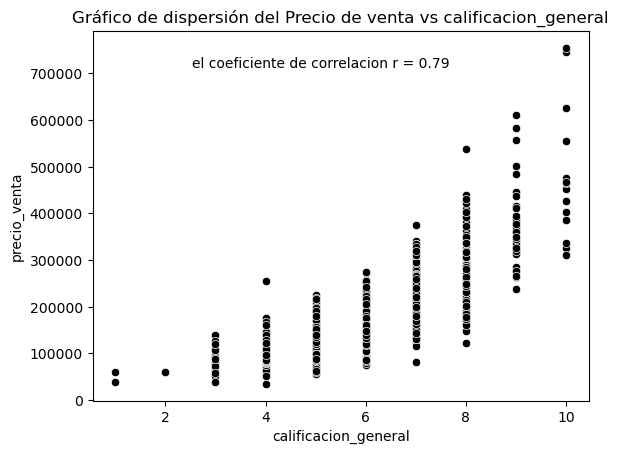

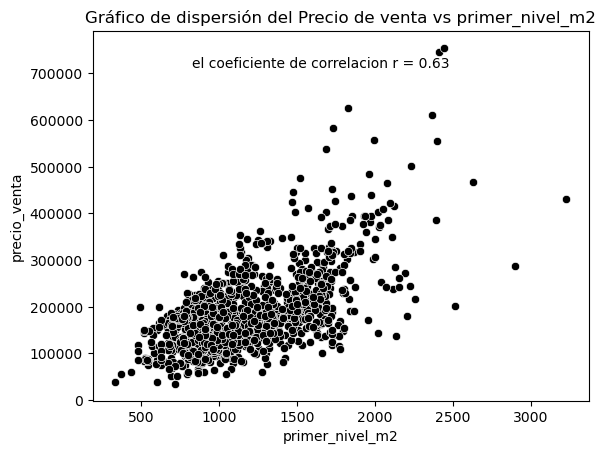

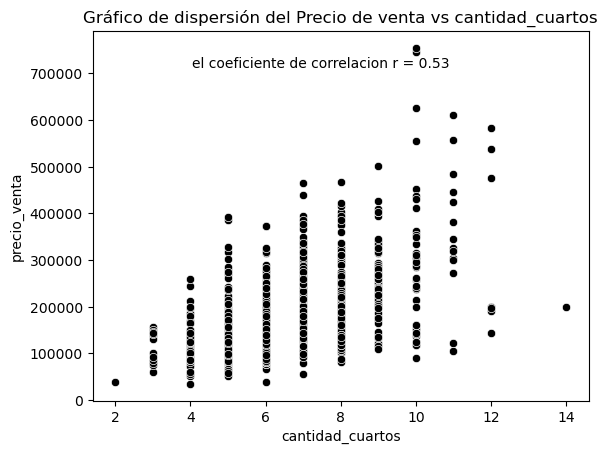

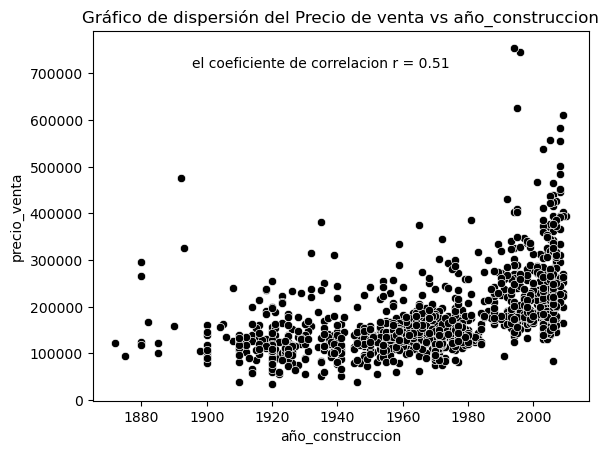

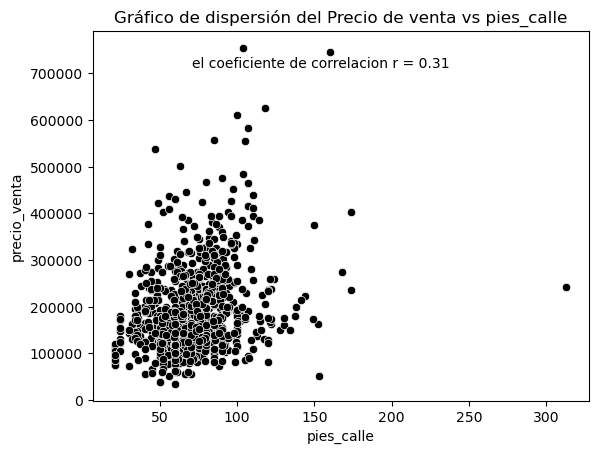

In [17]:
for variable in independientes:
  x = data_set_entrenamiento[variable]
  sns.scatterplot(x=x, y=dependiente, color = 'black')
  plt.title(f"Gráfico de dispersión del Precio de venta vs {variable}")
  plt.annotate(f"el coeficiente de correlacion r = {round(coeficientes_calculados[variable],2)}", xy=(0.2, 0.9), xycoords="axes fraction") #xycoords= axes fraction nos asegura que la anotacion no se mueva independientemente de la escala
  plt.show()

- Como podemos notar en las graficas de dispersión y el coeficiente de correlación calculado, las variables que mejor se relacion tiene con la variable de interes Y son:    
  
    - X1: "calificacion_general" con un coeficiente de 0.79  
    - X2: "primer_nivel_m2" con un coeficiente de 0.63

### 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 + β1 ∗ x.

In [18]:
class RegresionLineal():
    
    # Creacion de la clase con los datos y parámetros del modelo
    def __init__(self, x, y, iteraciones, imprimir_cada, tasa_aprendizaje):
        #Especificamos los atributos
        self.x = x # Datos de entrada
        self.y = y # Datos objetivo
        self.b0 = 0.0 # Coeficiente de intercepción inicializado en 0
        self.b1 = 0.0 # Coeficiente de pendiente inicializado en 0
        self.iteraciones = iteraciones # Número de iteraciones para el entrenamiento
        self.historial_errores = []  # Lista para registrar el error en cada iteración
        self.modelo_historico = {} # Diccionario para guardar el estado del modelo en ciertas iteraciones
        self.y_vectorizada = np.reshape(y, (-1, 1)) # Conversión de y a vector columna
        self.unos_vector = np.ones_like(x).reshape(-1, 1) # Creación de vector de unos para término independiente
        self.x_con_unos = np.hstack([np.reshape(x, (-1, 1)), self.unos_vector]) # Concatenación de x y el vector de unos para formar una matriz
        self.coeficientes = np.array([[self.b1], [self.b0]]) # Inicialización de los coeficientes del modelo

        # Bucle para actualizar el modelo en cada iteración
        for i in range(iteraciones):
            self._actualizar_modelo(i, imprimir_cada, tasa_aprendizaje)
    # Método para obtener el histórico del modelo y el historial de errores
    def obtener_modelo(self):
        return self.modelo_historico, np.array(self.historial_errores)
    # Método estático para graficar el historial de errores
    @staticmethod
    def graficar_errores(errores):
        plt.figure(figsize=(9, 7))
        plt.plot(errores, color="#000000")
        plt.title("Errores del modelo")
        plt.xlabel("Número de iteraciones")
        plt.ylabel('Error')
        plt.show()

    # Método estático para mostrar la evolución del modelo a lo largo de las iteraciones        
    @staticmethod
    def mostrar_evolucion(modelo, n):
        keys = list(modelo.keys())
        for i in keys:
            if i % round(n) == 0:
                y_pred = modelo[i][1]
                y_real = modelo[i][2]
                x = modelo[i][3]
                plt.figure(figsize=(9, 7))
                plt.scatter(x, y_real, edgecolor='k', color="#000000")
                plt.plot(x, y_pred, linestyle='solid', color='r', label=f'Iteración: {i}')
                plt.title(f"Iteración: {i}")
                plt.legend()
                plt.xlabel("X")
                plt.ylabel("Y")
                plt.show()

    # Método para realizar predicciones con el modelo              
    def predecir(self, nuevo_x):
        unos_nuevo_x = np.ones_like(nuevo_x).reshape(-1, 1)
        x_preparada = np.hstack([np.reshape(nuevo_x, (-1, 1)), unos_nuevo_x])
        return np.dot(x_preparada, self.coeficientes)

    # Método estático para comparar las predicciones
    @staticmethod
    def comparar_predicciones(m_propio, m_sklearn, datos_predecir, modelo):
        resultado_propio = m_propio.predecir(datos_predecir.reshape(-1, 1))
        resultado_sklearn = m_sklearn.predict(datos_predecir.reshape(-1, 1))
        promedio = (resultado_propio + resultado_sklearn) / 2
        plt.figure(figsize=(9, 7))
        for i in list(modelo.columns.values):
            y = modelo[i]
            plt.scatter(datos_predecir, y, edgecolor='k', color="#000000")
            plt.plot(datos_predecir, resultado_propio, color="#10d8e6", label='My_regresion: ')
            plt.plot(datos_predecir, resultado_sklearn, color="#e610d1", label='Msklearn: ')
            plt.plot(datos_predecir, promedio, color="orange", label='Promedio: ')
            plt.title("Comparativa")
            plt.legend()
            plt.xlabel("X")
            plt.ylabel('Y')
            plt.show()
        return resultado_propio, resultado_sklearn, promedio

    # Compara los errores de dos modelos usando el error cuadrático medio.
    @staticmethod
    def comparar_errores(modelos, modelos2, prueba1, prueba2, set_prueba):
        labels = ['OverallQual', 'First Floor square feet']
        errores = [metrics.mean_squared_error(modelo, prueba) for modelo, prueba in zip(modelos, [prueba1, prueba2])]
        errores2 = [metrics.mean_squared_error(modelo, prueba) for modelo, prueba in zip(modelos2, [prueba1, prueba2])]   
        plt.figure(figsize=(9, 7))
        t = np.arange(len(labels))
        plt.xticks(t + 0.90 / 3, labels)
        plt.bar(t, errores, width=0.30, edgecolor='k', color="#d91c1c", label="My_regresion")
        plt.bar(t + 0.30, errores2, width=0.30, edgecolor='k', color="#081bc7", label="Msklearn")
        plt.legend()
        plt.title("Comparativa")
        plt.show()

    # Método privado para actualizar los coeficientes del modelo en cada iteración.
    def _actualizar_modelo(self, iteracion, imprimir_cada, tasa_aprendizaje):
        predicciones = np.dot(self.x_con_unos, self.coeficientes)
        error = 1 / (2 * self.y_vectorizada.shape[0]) * np.sum((self.y_vectorizada - predicciones) ** 2)
        self.historial_errores.append(error)
        if iteracion % round(imprimir_cada) == 0:
            print(f'\nIteraciones: {iteracion}, Error: {error}')
        gradiente = tasa_aprendizaje * (1 / self.y_vectorizada.shape[0] * np.sum((predicciones - self.y_vectorizada) * self.x_con_unos, axis=0, keepdims=True)).T
        self.coeficientes -= gradiente
        self.modelo_historico[iteracion] = [self.coeficientes, predicciones, self.y_vectorizada, self.x]


Iteraciones: 0, Error: 19814545598.373714

Iteraciones: 1000, Error: 1348954023.4822884

Iteraciones: 2000, Error: 1283260820.7203937

Iteraciones: 3000, Error: 1258347950.2536988

Iteraciones: 4000, Error: 1248900228.2855697

Iteraciones: 5000, Error: 1245317363.3360493


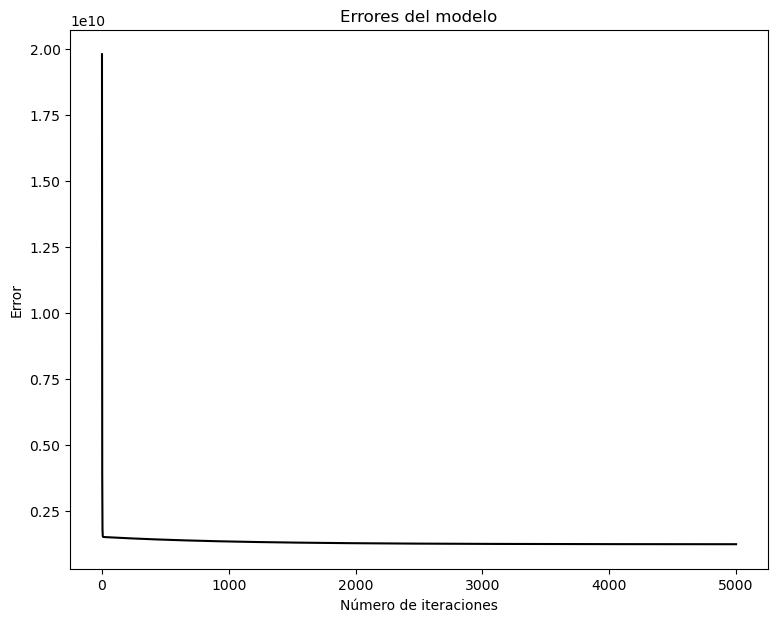

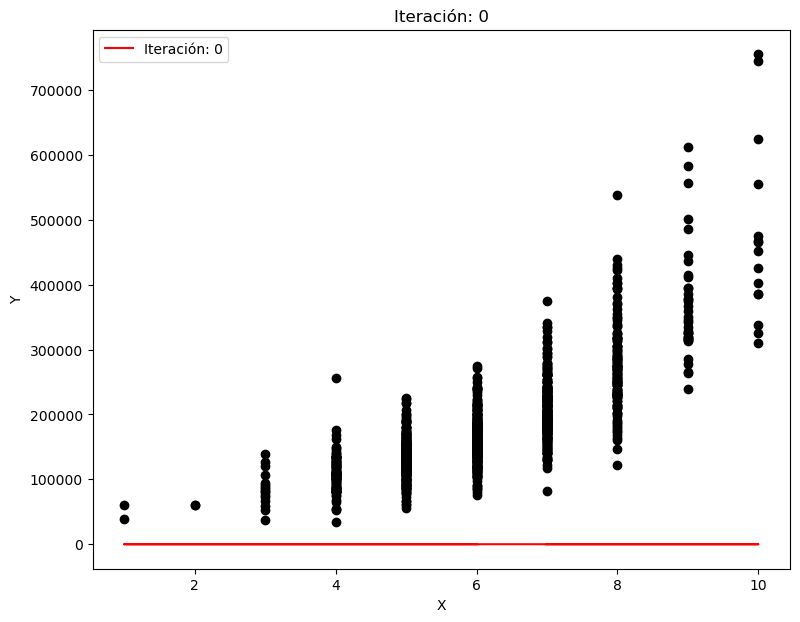

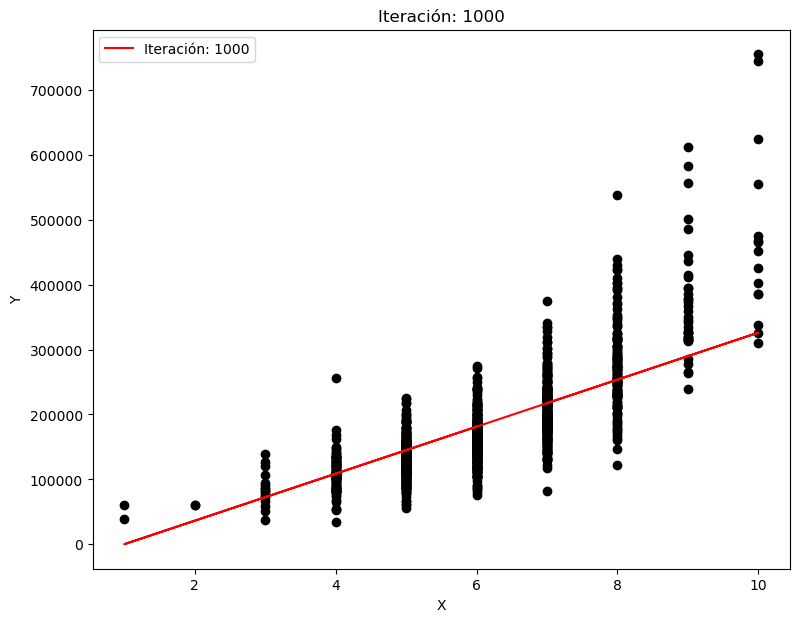

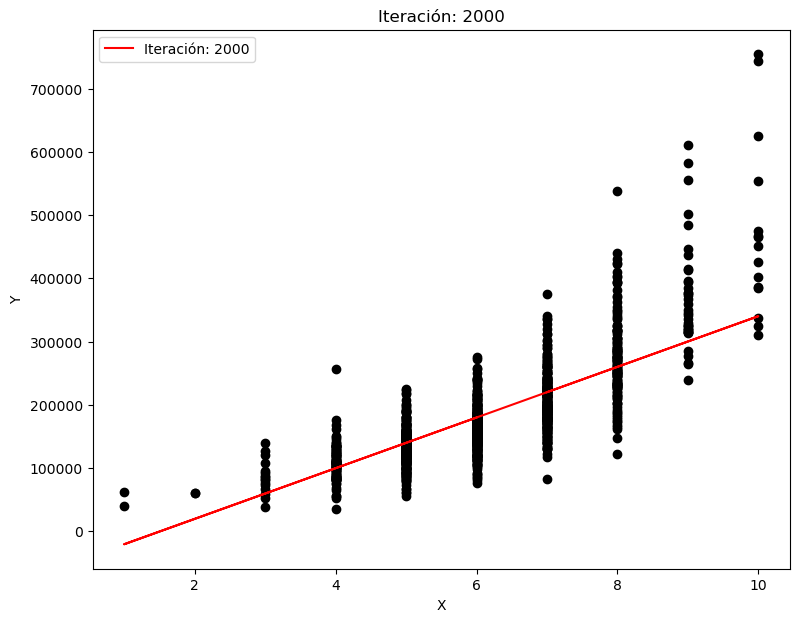

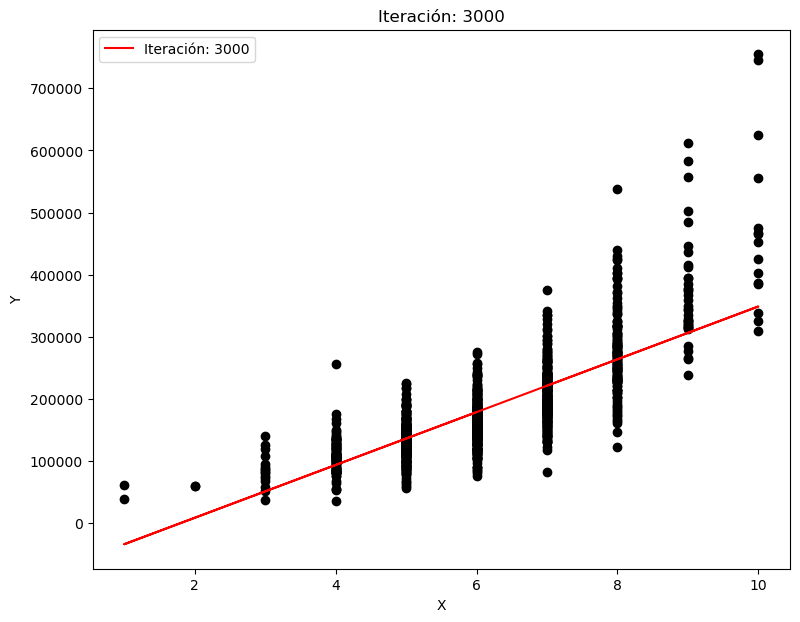

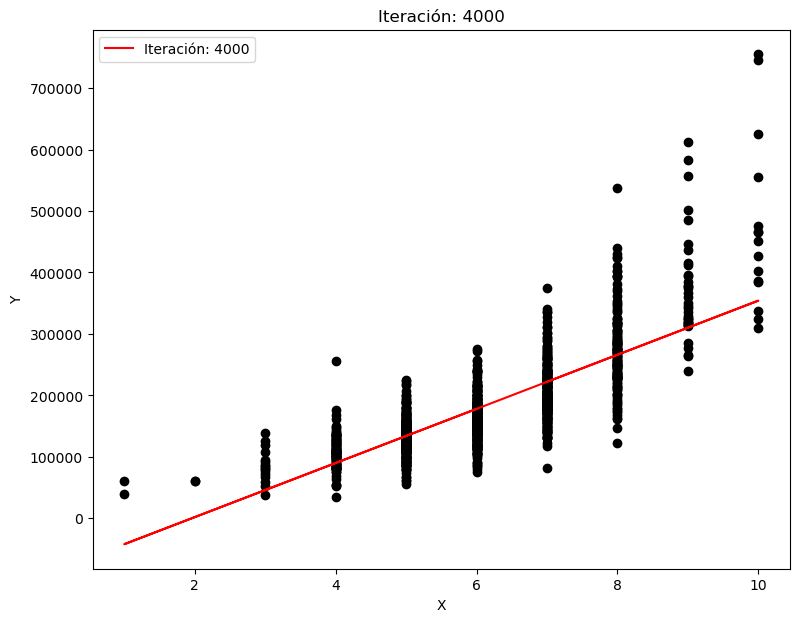

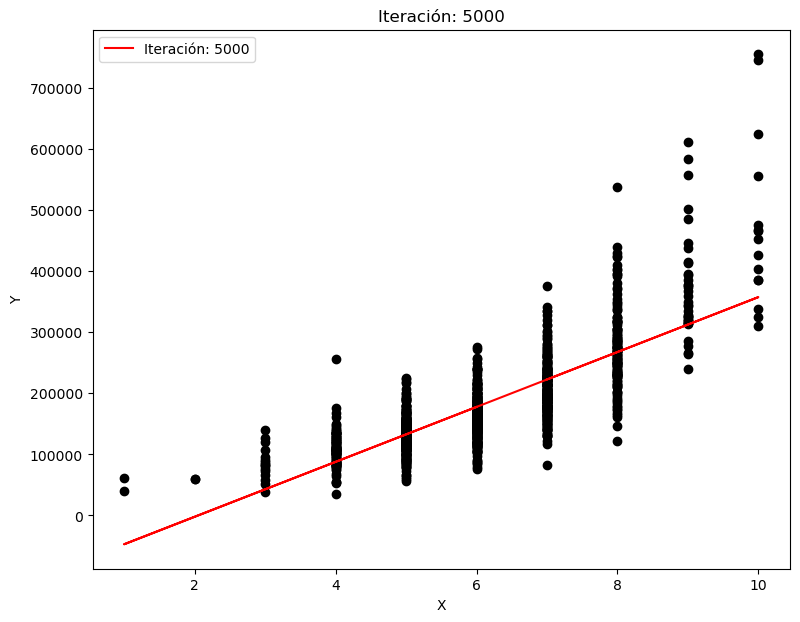

In [19]:
# Reshape y extracción de la columna 'precio_venta' del dataset de entrenamiento
# para usarla como variable dependiente (Y) en el modelo.
NPVentas = np.reshape(np.array(data_set_entrenamiento['precio_venta']), (-1, 1))

# Reshape y extracción de la columna 'calificacion_general' del dataset de entrenamiento
# para usarla como una de las variables independientes (X) en el modelo.
NPcalificacion_general = np.reshape(np.array(data_set_entrenamiento['calificacion_general']), (-1, 1))

# Reshape y extracción de la columna 'primer_nivel_m2' del dataset de entrenamiento
# para ser otra variable independiente (X) en el modelo
NPprimer_nivel_m2 = np.reshape(np.array(data_set_entrenamiento['primer_nivel_m2']), (-1, 1))

# Número de iteraciones para el entrenamiento del modelo.
Epoch = 5001
# Frecuencia con la que se imprimirá la información del modelo durante el entrenamiento.
Imprimir = 1000
# Tasa de aprendizaje para ajustar los coeficientes del modelo en cada iteración.
Escalar = 0.01

# Creación del modelo de regresión lineal utilizando 'NPcalificacion_general' como X 
# y 'NPVentas' como Y, junto con los parámetros de iteraciones, frecuencia de impresión  y tasa de aprendizaje definidos anteriormente.
modelo_1 = RegresionLineal(NPcalificacion_general, NPVentas, Epoch, Imprimir, Escalar)

# Utilización de la función estática 'graficar_errores' de la clase 'RegresionLineal' para visualizar la evolución del error 
RegresionLineal.graficar_errores(modelo_1.obtener_modelo()[1])

# Utilización de la función estática 'mostrar_evolucion' de la clase 'RegresionLineal' para visualizar cómo ha evolucionado 
# el modelo a lo largo de las iteraciones especificadas en 'Imprimir'.
RegresionLineal.mostrar_evolucion(modelo_1.obtener_modelo()[0], Imprimir)


Iteraciones: 0, Error: 19814545598.373714

Iteraciones: 10, Error: 2712335484.015544

Iteraciones: 20, Error: 2040451265.2975237

Iteraciones: 30, Error: 2014055351.4984334

Iteraciones: 40, Error: 2013018347.463737

Iteraciones: 50, Error: 2012977603.6239016


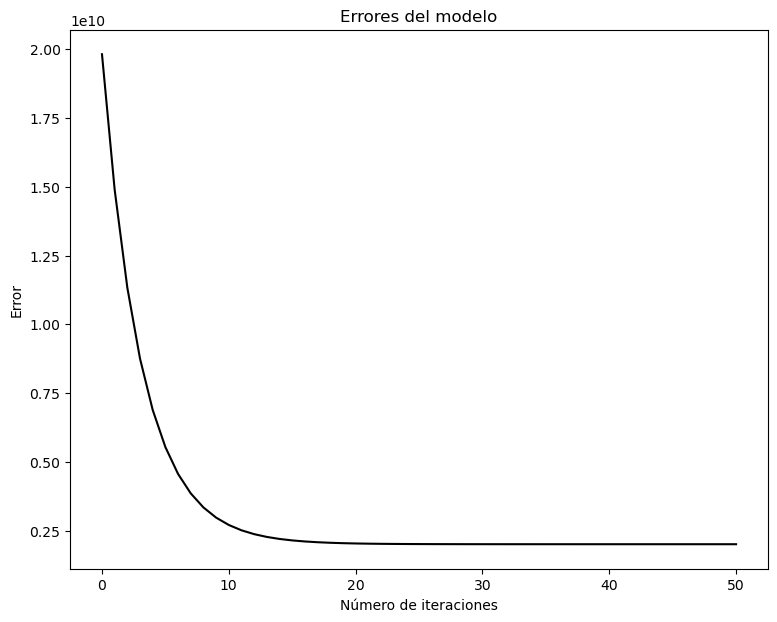

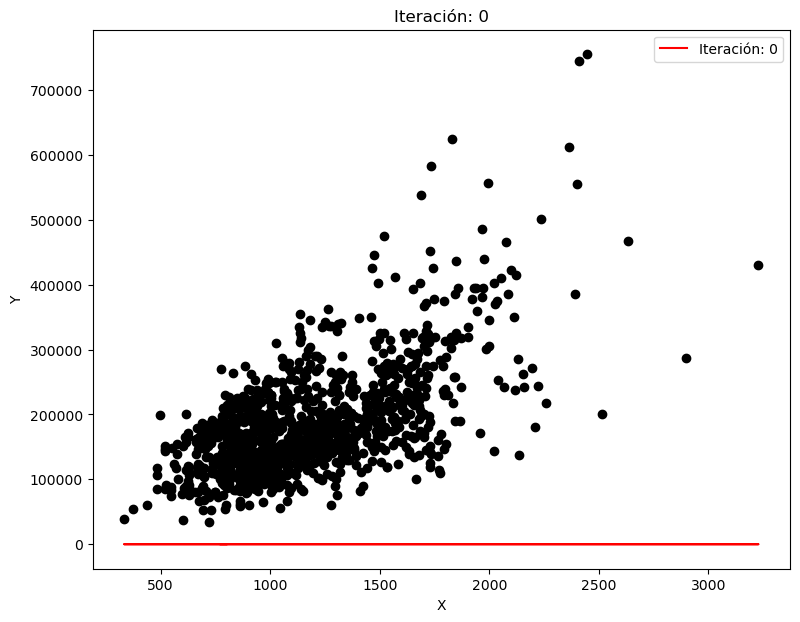

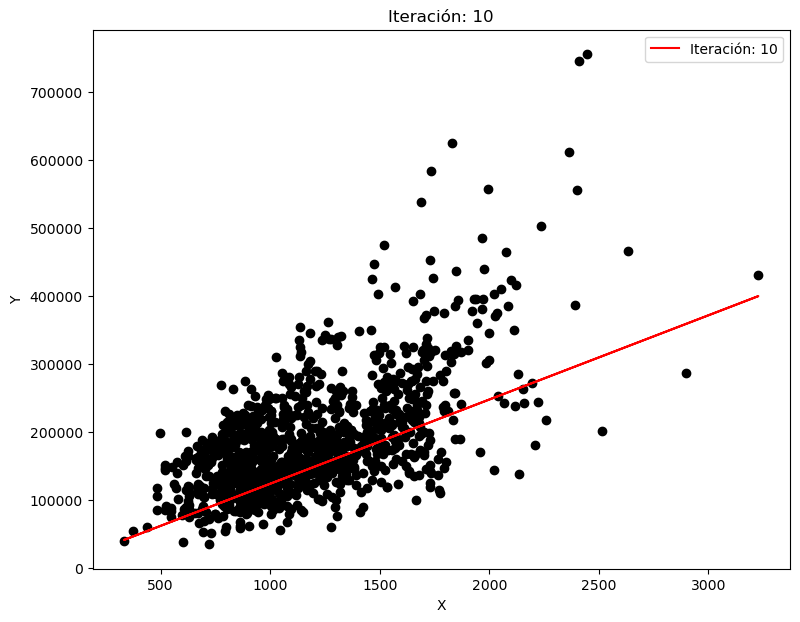

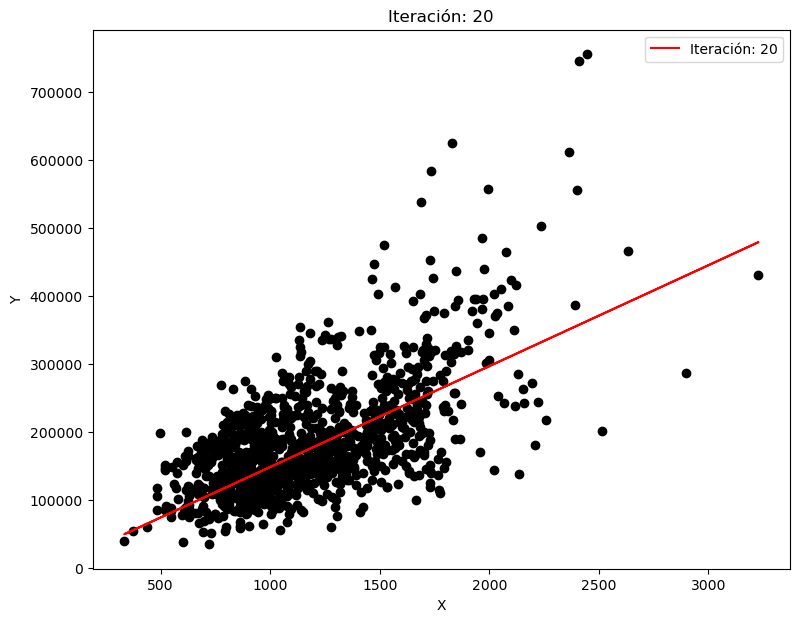

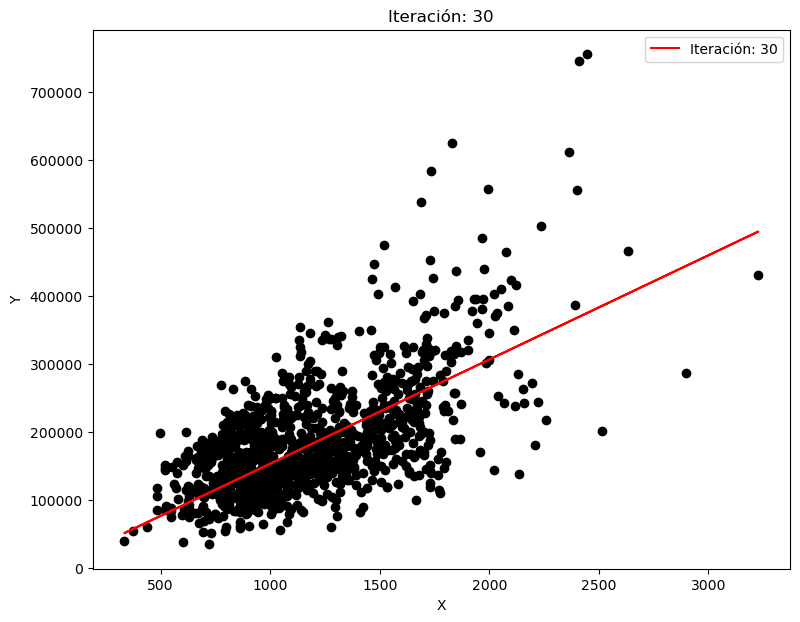

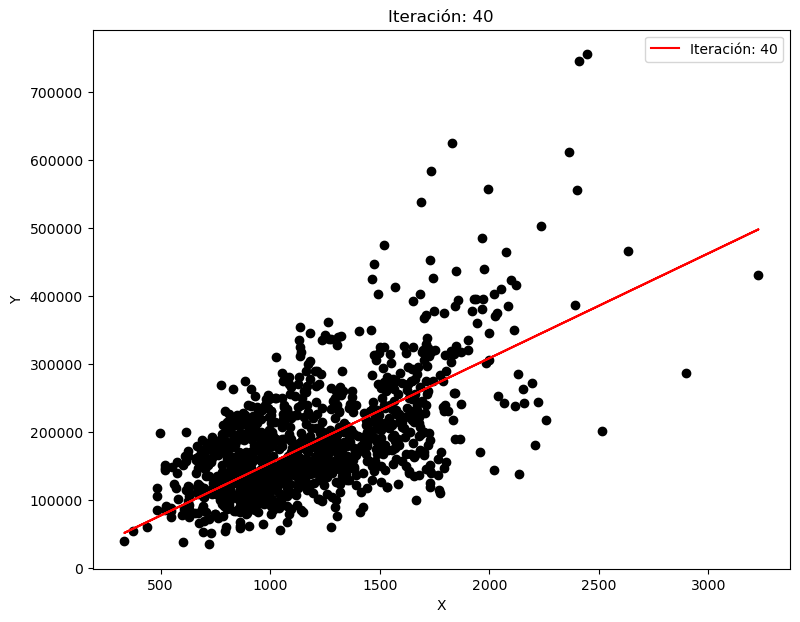

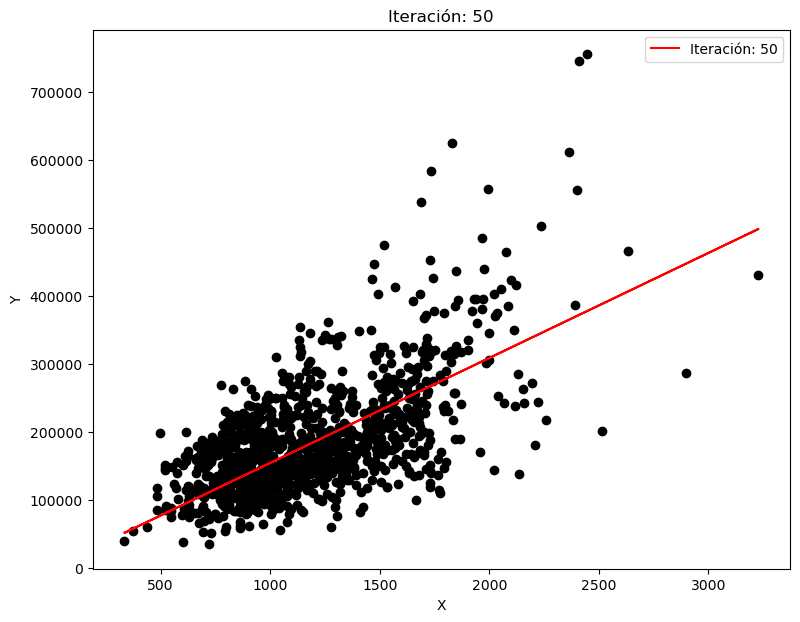

In [20]:
NPVentas = np.reshape(np.array(data_set_entrenamiento['precio_venta']), (-1, 1))
NPcalificacion_general = np.reshape(np.array(data_set_entrenamiento['calificacion_general']), (-1, 1))
NPprimer_nivel_m2 = np.reshape(np.array(data_set_entrenamiento['primer_nivel_m2']), (-1, 1))

Epoch = 51
Imprimir = 10
Escalar = 0.0000001

modelo_2 = RegresionLineal(NPprimer_nivel_m2, NPVentas, Epoch, Imprimir, Escalar)

RegresionLineal.graficar_errores(modelo_2.obtener_modelo()[1])

RegresionLineal.mostrar_evolucion(modelo_2.obtener_modelo()[0], Imprimir)

### Sklearn, entrenando el modelo

In [21]:
# Creación de un objeto de regresión lineal para la calificación general.
ent_calificacion_general = LinearRegression()

# Entrenamiento del modelo de regresión lineal utilizando 'NPcalificacion_general' como la variable independiente (X)
# y 'NPVentas' como la variable dependiente (Y).
ent_calificacion_general.fit(NPcalificacion_general, NPVentas)


ent_primer_nivel_m2 = LinearRegression()
ent_primer_nivel_m2.fit(NPprimer_nivel_m2, NPVentas)

LinearRegression()

### Vector de pruebas

In [22]:
# Esta columna representa una de las variables independientes (X) que se utilizará para evaluar
# el rendimiento del modelo entrenado con 'calificacion_general' como predictor.

Pruebas_calificacion_general = np.reshape(np.array(data_set_validacion['calificacion_general']), (-1, 1))
Pruebas_primer_nivel_m2 = np.reshape(np.array(data_set_validacion['primer_nivel_m2']), (-1, 1))

### comparacion modelos

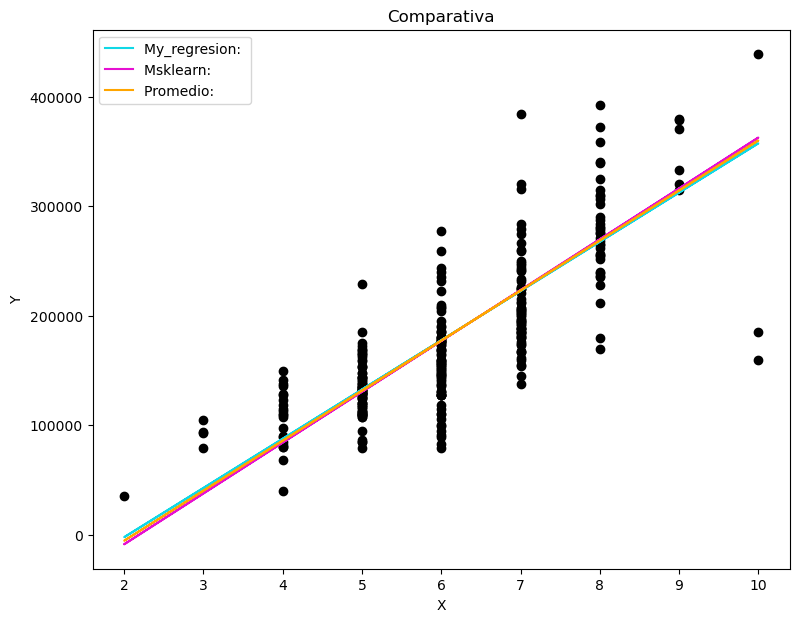

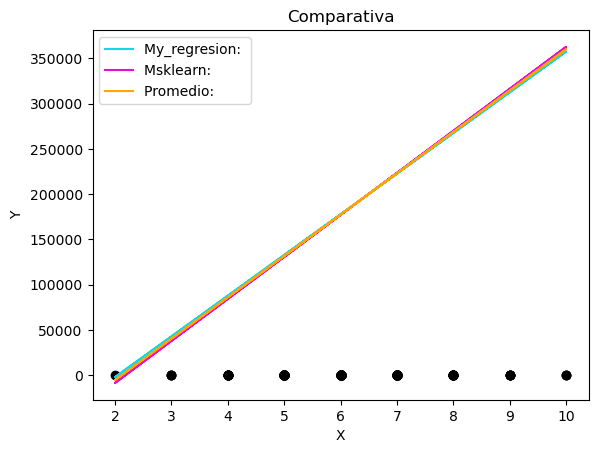

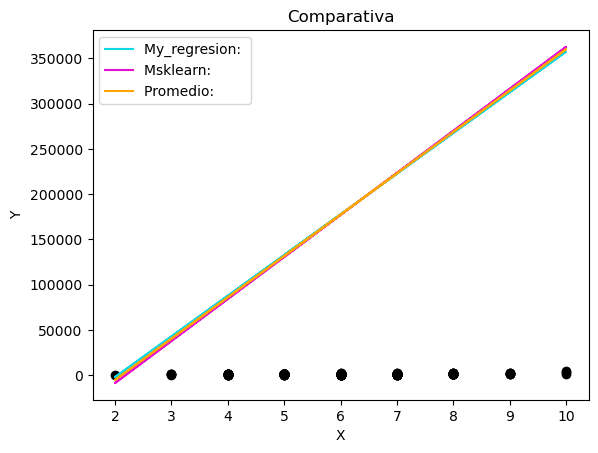

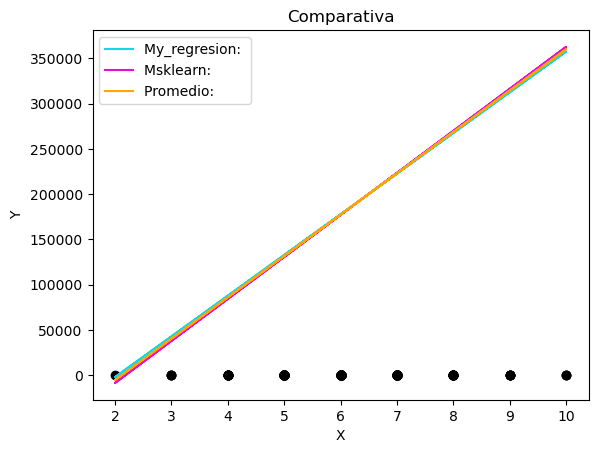

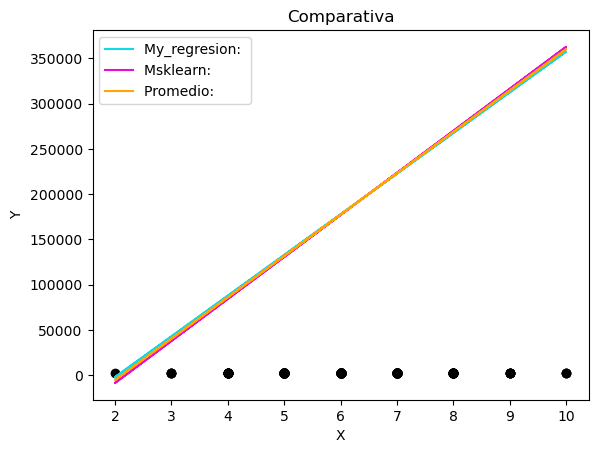

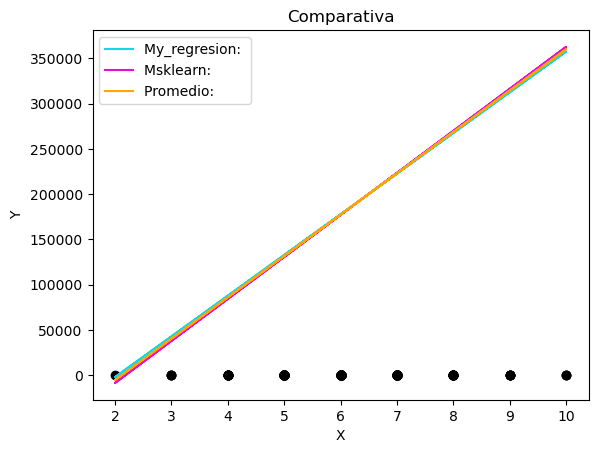

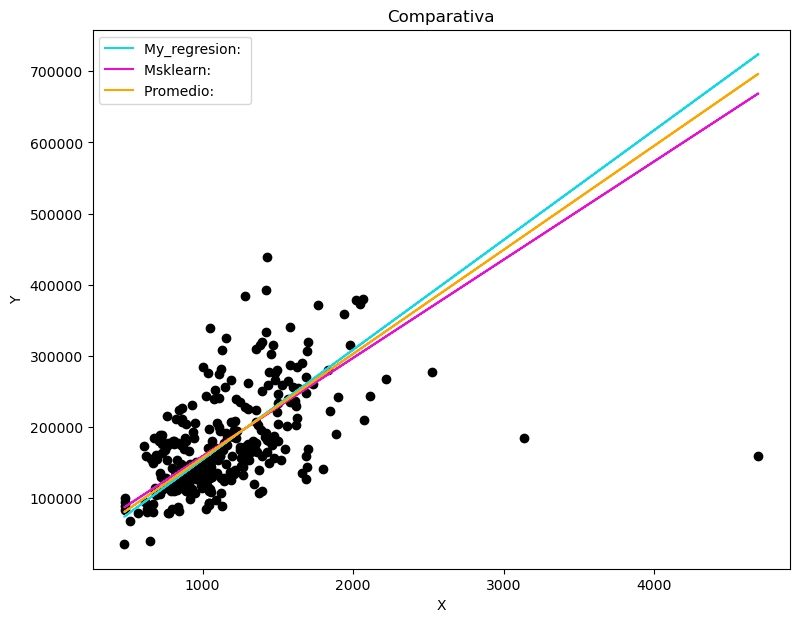

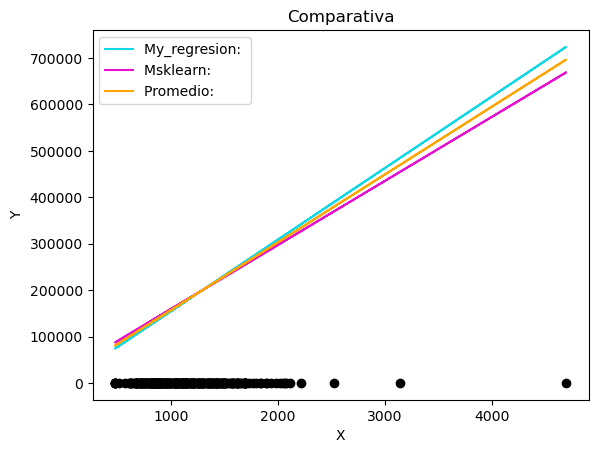

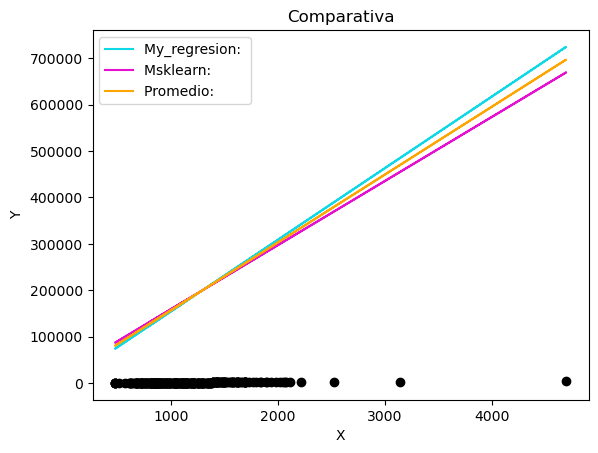

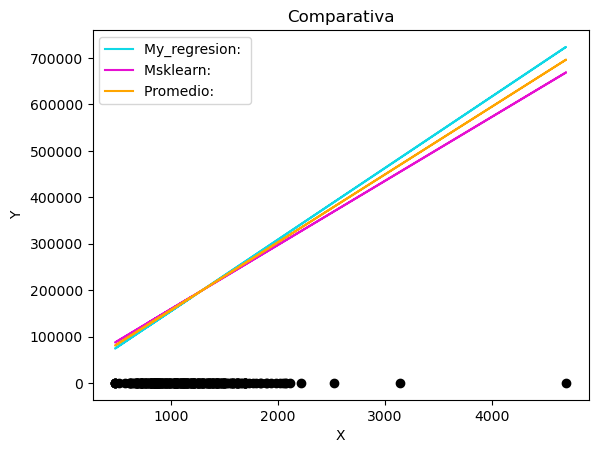

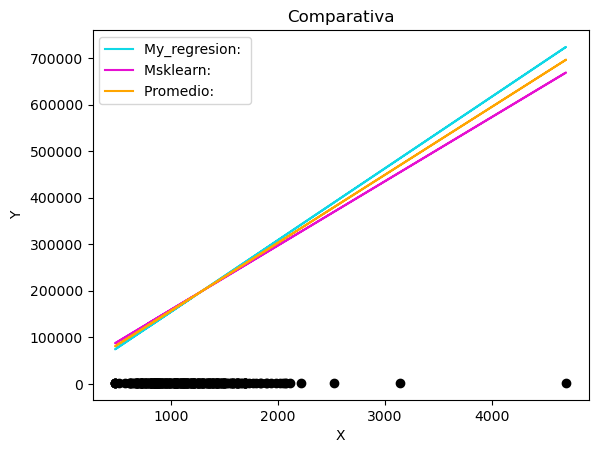

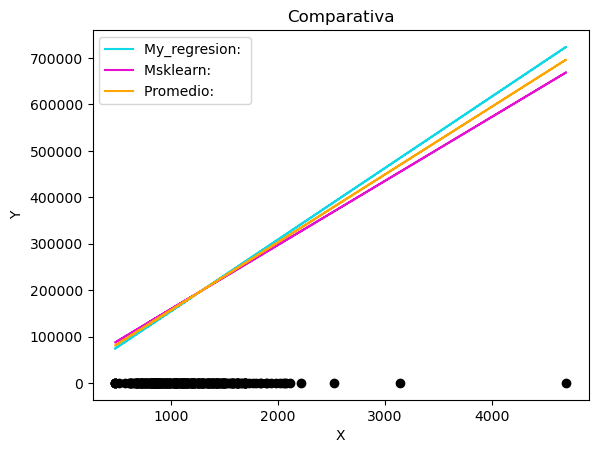

In [23]:
# Utiliza el método estático 'comparar_predicciones' de la clase 'RegresionLineal' para comparar las predicciones
# del modelo entrenado manualmente (modelo_1) con el modelo entrenado con scikit-learn (ent_calificacion_general)

# Esto visualiza las predicciones de ambos modelos y el promedio de las predicciones para visualmente compararlos
# Aquí se compara el rendimiento de estos modelos en la predicción de 'NPVentas' a partir de los datos de las variables independietes
modelo_calificacion_general = RegresionLineal.comparar_predicciones(modelo_1, ent_calificacion_general, Pruebas_calificacion_general, data_set_validacion)
modelo_primer_nivel_m2 = RegresionLineal.comparar_predicciones(modelo_2, ent_primer_nivel_m2, Pruebas_primer_nivel_m2, data_set_validacion)

### Link para video explicativo

https://drive.google.com/file/d/1k5eS4WfgJj8r74UJnUAIMzD_ysnyINeP/view?usp=sharing